In [391]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import h5py
import scipy
%matplotlib inline
import pandas as pd
import csv
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

In [392]:
def initialise():
    w = np.random.randn()*0.1
    b = np.random.randn()*0.1
    return w,b

In [393]:
def forward_propagate(w,b,X,Y):
    y_pred = w*X+b  # predict using our initial params
    m=X.shape[0]
    cost = (1/2)*np.mean((y_pred-Y)**2)  # compute cost
    
    dw = (1 / m) * np.sum((y_pred - Y)*X)   # compute gradients
    db = (1 / m) * np.sum(y_pred - Y)

    return dw, db, cost, y_pred

In [438]:
def grad_descent(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    #update parameters, propagate, update again num_iterations times.
    inbetween_w = []
    inbetween_b = []
    for i in range(num_iterations):
        dw, db, cost, y_pred = forward_propagate(w, b, X, Y)
        w = w - learning_rate * dw
        b = b - learning_rate * db
        if i%50 == 0:
            inbetween_w.append(w)
            inbetween_b.append(b)
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, cost, inbetween_w, inbetween_b

In [395]:
def predict(w,b,X,Y):
    dw, db, cost, y_pred = forward_propagate(w,b,X,Y)  #predict

    return y_pred

In [439]:
def model(X_train, y_train, X_test, y_test, num_iterations, learning_rate):
    
    w, b = initialise()    #start with random w,b
    initialial_params =[w,b]
    # Gradient descent
    parameters, grads, costs, inbetween_w, inbetween_b = grad_descent(w, b, X_train, y_train, num_iterations, learning_rate)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test, y_test)
    Y_prediction_train = predict(w, b, X_train, y_train)
    
    print("train accuracy: {} %".format(100-np.mean(np.fabs(Y_prediction_train - y_train)/y_train) * 100))
    print("test accuracy: {} %".format(100-np.mean(np.fabs(Y_prediction_test - y_test)/y_test) * 100))
    
    print("w = {} ".format(w))
    print("b = {}".format(b))
    
    return w,b, inbetween_w, inbetween_b

In [443]:
#reading in data, preprocessing and fitting model
dft = pd.read_csv("datasets/placement.csv")
x = dft['package']
y = dft['cgpa']
y = y.values.reshape([200,1])
x = x.values.reshape([200,1])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=109)
d = model(X_train, y_train, X_test, y_test, num_iterations = 200, learning_rate = 0.05)

train accuracy: 93.0016956286051 %
test accuracy: 93.90848904005432 %
w = 1.7916550826084696 
b = 1.537338288850299


Text(0, 0.5, 'package')

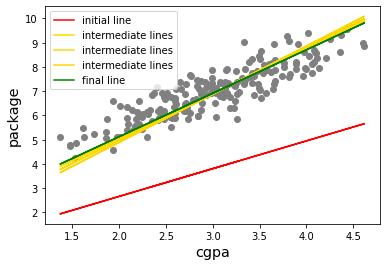

In [444]:
#plotting data, adding the final line and some intermediary lines to show improvement of model with iterations
plt.scatter(x,y, c='grey')
inbetween_w = d[2]
inbetween_b = d[3]
for i in range(len(inbetween_w)):
    abline_values = [inbetween_w[i] * j + inbetween_b[i] for j in x]
    if i == 0:
        plt.plot(x, abline_values, '-r', label = "initial line")
    else:
        plt.plot(x, abline_values, 'gold', label = "intermediate lines")
w = d[0]
b = d[1]
y_hat = w*x+b
plt.plot(x,y_hat, '-g', label = "final line")
plt.legend()
plt.xlabel("cgpa")
plt.ylabel("package")